In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import re
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
imported = pd.read_csv('/Users/rajathadri_as/Documents/CFS-trade_adcounts.csv')

In [4]:
imported.shape

(136, 4)

In [5]:
imported.head()

,trade,yearr,monthh,monthly_count
0,0,2016,6,1
1,0,2016,11,1
2,0,2017,1,1
3,0,2017,11,1
4,0,2018,2,1


In [6]:
df_dealer = imported[imported['trade']==1]

In [7]:
df_dealer.shape

(81, 4)

In [8]:
df_pvt = imported[imported['trade']==0]

In [9]:
df_pvt.shape

(55, 4)

In [11]:
df_dealer = df_dealer[['yearr','monthh','monthly_count']]

In [12]:
df_pvt = df_pvt[['yearr','monthh','monthly_count']]

In [15]:
df_pvt[df_pvt['yearr']==2023]

,yearr,monthh,monthly_count
46,2023,1,254
47,2023,2,219
48,2023,3,435
49,2023,4,427
50,2023,5,383
51,2023,6,362
52,2023,7,592
53,2023,8,984
54,2023,9,10


In [16]:
df_dealer[df_dealer['yearr']==2023]

,yearr,monthh,monthly_count
127,2023,1,1079
128,2023,2,1185
129,2023,3,1556
130,2023,4,1023
131,2023,5,3641
132,2023,6,1549
133,2023,7,1593
134,2023,8,955
135,2023,9,5


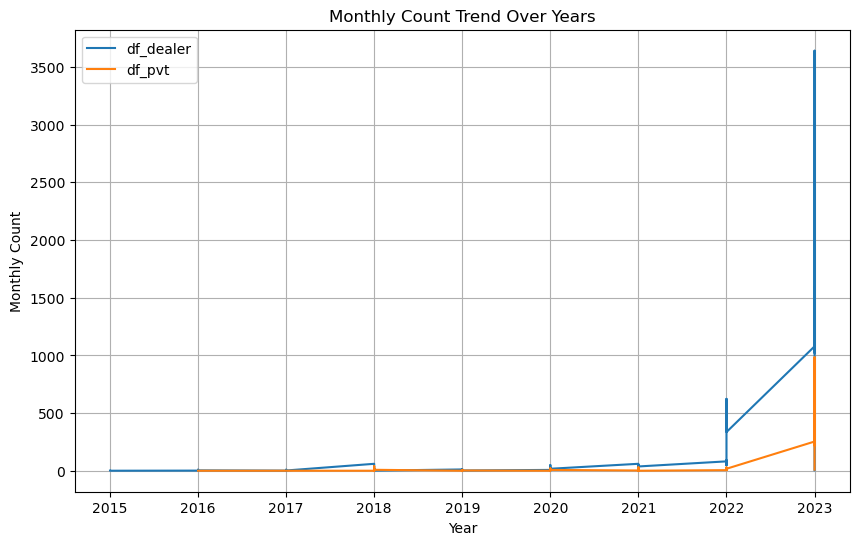

In [14]:
# Combine dataframes if needed
combined_df = pd.concat([df_dealer, df_pvt])

# Group the combined dataframe by year and calculate the sum of monthly_count
grouped_df = combined_df.groupby(['yearr', 'monthh'])['monthly_count'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))

# Filter xticks to show only years
unique_years = grouped_df['yearr'].unique()
plt.xticks(unique_years)

# Plot lines for df_dealer and df_pvt
for label, df in [('df_dealer', df_dealer), ('df_pvt', df_pvt)]:
    df_grouped = df.groupby(['yearr', 'monthh'])['monthly_count'].sum().reset_index()
    plt.plot(df_grouped['yearr'], df_grouped['monthly_count'], label=label)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Monthly Count')
plt.title('Monthly Count Trend Over Years')
plt.legend()

# Show the plot
plt.grid()
plt.show()
